In [282]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [381]:
StockName='NVDA'

In [382]:
start = datetime.date.today() - datetime.timedelta(days=365)
end = datetime.date.today()
Stock = data.DataReader(StockName, 'google', start, end)

In [383]:
Stock.columns.names = ['Stock Info']
Stock.head()

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2016-04-11,35.87,36.47,35.76,35.88,9688098
2016-04-12,36.00,36.05,35.14,35.84,7313569
2016-04-13,36.00,36.75,36.00,36.74,8763641
2016-04-14,36.64,37.00,36.49,36.84,10409771
2016-04-15,36.83,37.46,36.71,37.13,10914835


# Rolling Averages Section

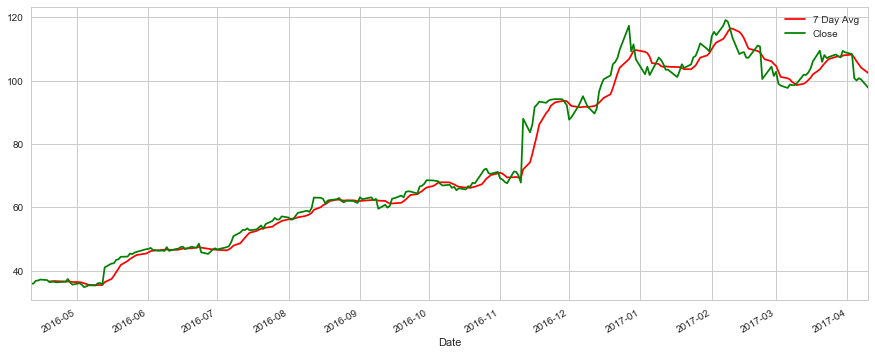

In [384]:
plt.figure(figsize=(15,6))
Stock['Close'].rolling(window=7).mean().plot(label='7 Day Avg',color='r')
Stock['Close'].plot(label='Close',color='g')
plt.legend()

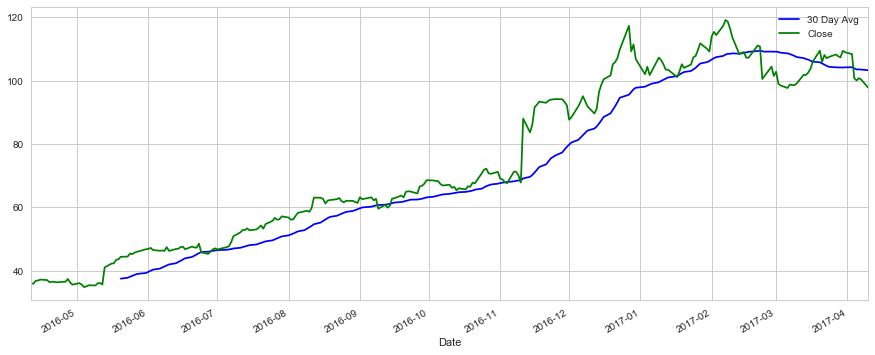

In [385]:
plt.figure(figsize=(15,6))
Stock['Close'].rolling(window=30).mean().plot(label='30 Day Avg',color='b')
Stock['Close'].plot(label='Close',color='g')
plt.legend()

# Moving Average Convergence Divergence (MACD)  Section

Setting EMA values

In [386]:
EMA_len=[12,26,9]

Initial EMA Calculation

In [387]:
EMA_12=2/(EMA_len[0]+1)*(Stock['Close'][EMA_len[0]])+(1-2/(EMA_len[0]+1))*Stock['Close'][0:EMA_len[0]].mean()

In [388]:
EMA_26=2/(EMA_len[1]+1)*(Stock['Close'][EMA_len[1]])+(1-2/(EMA_len[1]+1))*Stock['Close'][0:EMA_len[1]].mean()

Determining EMA values

In [389]:
ema12=[]
for i in range(0,len(Stock['Close'])):
    if i<EMA_len[0]:
        ema12.append(np.nan)
    else:
        ema12.append(EMA_12)
        EMA_12=(2/(EMA_len[0]+1))*Stock['Close'][i]+(1-2/(EMA_len[0]+1))*EMA_12

In [390]:
ema26=[]
for i in range(0,len(Stock['Close'])):
    if i<=EMA_len[1]:
        ema26.append(np.nan)
    else:
        ema26.append(EMA_26)
        EMA_26=(2/(EMA_len[1]+1))*Stock['Close'][i]+(1-2/(EMA_len[1]+1))*EMA_26

In [391]:
Stock['EMA12']=ema12
Stock['EMA26']=ema26

In [392]:
Stock['MACD']=Stock['EMA12']-Stock['EMA26']

Calculating Initial Signal Value

In [393]:
Signal=2/(EMA_len[2]+1)*(Stock['MACD'][EMA_len[1]+EMA_len[2]])+(1-2/(EMA_len[2]+1))*Stock['MACD'][EMA_len[1]:EMA_len[1]+EMA_len[2]].mean()

In [394]:
signal=[]
for i in range(0,len(Stock['Close'])):
    if i<=EMA_len[1]+EMA_len[2]:
        signal.append(np.nan)
    else:
        signal.append(Signal)
        Signal=(2/(EMA_len[2]+1))*Stock['MACD'][i]+(1-2/(EMA_len[2]+1))*Signal

In [395]:
Stock['Signal']=signal

In [396]:
Stock['MACD_Hist']=(Stock['MACD']-Stock['Signal'])

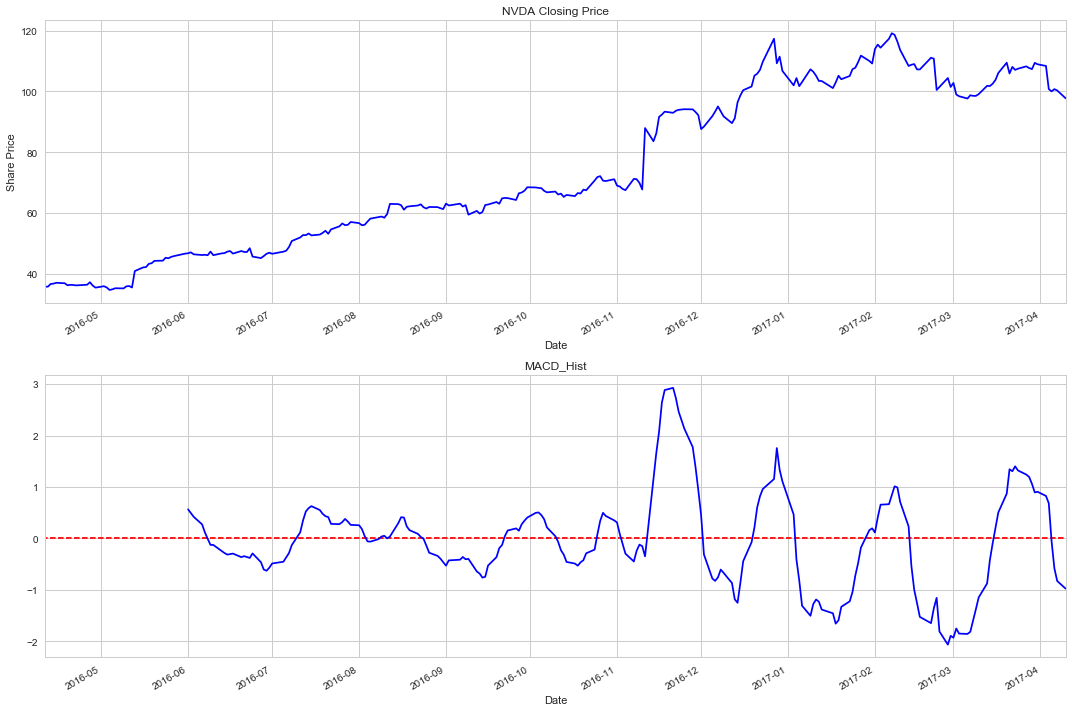

In [397]:
plt.figure(figsize=(15,10))
plt.subplot(211)
Stock['Close'].plot(label='Close',color='b')
plt.title('{} Closing Price'.format(StockName))
plt.ylabel('Share Price')

plt.subplot(212)
Stock['MACD_Hist'].plot(label='MACD_Hist',color='b')
plt.title('MACD_Hist')
plt.tight_layout()
plt.hlines(0,start,end, color='r',linestyles='--')